## Average Correct Rate of Control & CASK Groups by Active Poke Under Flipping Condition

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tools as tl
import paths
import intervals as invs

#### Define 2D lists to store values

In [2]:
# index 0 is control, index 1 is experiment
left_rate = [
    [], []
]

right_rate = [
    [], []
]

## Control Group

In [3]:
for path in paths.contigency_flip_ctrl:
    df = pd.read_csv(path)
    df = tl.preprocess_dataframe(df)
    rateL, rateR = tl.count_error_rate(df)
    left_rate[0].append(rateL)
    right_rate[0].append(rateR)

### Experiment Group

In [4]:
for path in paths.contigency_flip_cask:
    df = pd.read_csv(path)
    df = tl.preprocess_dataframe(df)
    rateL, rateR = tl.count_error_rate(df)
    left_rate[1].append(rateL)
    right_rate[1].append(rateR)

In [5]:
print("Left Active Average:", left_rate)
print("Right Active Average:", right_rate)

Left Active Average: [[0.49, 0.5, 0.41, 0.59, 0.57, 0.61], [0.57, 0.57, 0.56, 0.47, 0.35, 0.55, 0.41, 0.44, 0.38]]
Right Active Average: [[0.47, 0.39, 0.45, 0.22, 0.34, 0.32], [0.44, 0.37, 0.48, 0.4, 0.42, 0.43, 0.51, 0.47, 0.52]]


### Graphing

In [6]:
import numpy as np

In [7]:
# Calculate averages and standard deviation
left_averages = [np.mean(sublist) for sublist in left_rate]
right_averages = [np.mean(sublist) for sublist in right_rate]
left_sem = [np.std(data) / np.sqrt(len(data)) for data in left_rate]
right_sem = [np.std(data) / np.sqrt(len(data)) for data in right_rate]

In [8]:
left_sem

[0.028128343422670732, 0.02743242101798697]

In [9]:
# Define groups
groups = ['Control Group', 'CASK Group']

In [10]:
# Define xticks length
x = np.arange(len(groups))
width = 0.2

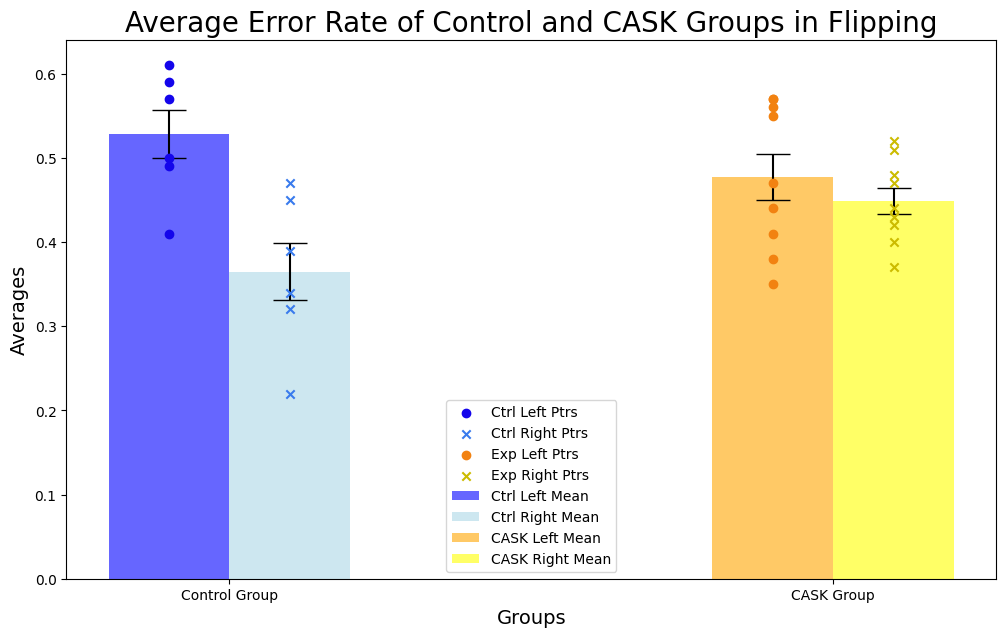

In [11]:
# Create the bar plot for averages
fig, ax = plt.subplots(dpi=100)
fig.set_size_inches(12, 7)

ctrl_left_bars = ax.bar(x[0] - width/2, left_averages[0], width, label='Ctrl Left Mean',
                   color='blue', alpha=0.6, yerr=left_sem[0], capsize=12, zorder=1)
x_values = np.full(len(left_rate[0]), x[0] - width/2)
ax.scatter(x_values, left_rate[0], marker='o', zorder=2,
           color='#1405eb', label='Ctrl Left Ptrs')

ctrl_right_bars = ax.bar(x[0] + width/2, right_averages[0], width, label='Ctrl Right Mean',
                  color='lightblue', alpha=0.6, yerr=right_sem[0], capsize=12, zorder=1)
x_values = np.full(len(right_rate[0]), x[0] + width/2)
ax.scatter(x_values, right_rate[0], marker='x', zorder=2,
           color='#397bed', label='Ctrl Right Ptrs')

cask_left_bars = ax.bar(x[1] - width/2, left_averages[1], width, label='CASK Left Mean',
                   color='orange', alpha=0.6, yerr=left_sem[1], capsize=12, zorder=1)
x_values = np.full(len(left_rate[1]), x[1] - width/2)
ax.scatter(x_values, left_rate[1], marker='o',zorder=2,
           color='#f28211', label='Exp Left Ptrs')

cask_right_bars = ax.bar(x[1] + width/2, right_averages[1], width, label='CASK Right Mean',
                  color='yellow', alpha=0.6, yerr=right_sem[1], capsize=12, zorder=1)
x_values = np.full(len(right_rate[1]), x[1] + width/2)
ax.scatter(x_values, right_rate[1], marker='x', zorder=2,
           color='#ccbb00', label='Exp Right Ptrs')

ax.set_xlabel('Groups', fontsize=14)
ax.set_ylabel('Averages', fontsize=14)
ax.set_title('Average Error Rate of Control and CASK Groups in Flipping', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(groups)

ax.legend()
plt.show()


In [41]:
invs.MannWhitneyUTest(left_rate[0], right_rate[0])

U Statistic: 34.0
P-value: 0.008658008658008658
There is a significant difference between the two groups.


In [42]:
invs.perform_T_test(left_rate[0], right_rate[0])

P Value is  0.007283455737907809
There is a significant difference between the two groups.


* Left Active blocks seems make mice performs worse(error rate around 50%) when flipping. (First Active Poke correlation?)
* Experimental Group has no obvious difference in accuracy of left and right active poke
* Control has significant difference (Mann-whitney U test), but may due to small amount of data point?